In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import string
import nltk
import re
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from google.colab import drive
import warnings
warnings.filterwarnings('ignore')

In [2]:
with open('Goodwill.txt','r') as f:
  data = f.read()

In [3]:
data = data.lower().split("\n")

In [4]:
data

['   good will hunting',
 '           by',
 'matt damon & ben affleck',
 '',
 'fade in:',
 "ext. south boston st. patrick's day parade -- day cut to:",
 'int. l street bar & grille, south boston -- evening',
 "the bar is dirty, more than a little run down. if there is ever a cook on duty, he's not here now. as we pan across several empty tables, we can almost smell the odor of last nights beer and crushed pretzels on the floor.",
 '                               chuckie',
 '            oh my god, i got the most fucked up',
 "thing i been meanin' to tell you.",
 'as the camera rises, we find four young men seated around a table near the back of the bar.',
 'all oh jesus. here we go.',
 "the guy holding court is chuckie sullivan, 20, and the largest of the bunch. he is loud, boisterous, a born entertainer. next to him is will hunting, 20, handsome and confident, a soft- spoken leader. on will's right sits billy mcbride, 22, heavy, quiet, someone you definitely wouldn't want to tangle wit

In [5]:
#removing whitespace from the data
corpus = []
for line in data:
    a = line.strip()
    corpus.append(a)

In [6]:
corpus

['good will hunting',
 'by',
 'matt damon & ben affleck',
 '',
 'fade in:',
 "ext. south boston st. patrick's day parade -- day cut to:",
 'int. l street bar & grille, south boston -- evening',
 "the bar is dirty, more than a little run down. if there is ever a cook on duty, he's not here now. as we pan across several empty tables, we can almost smell the odor of last nights beer and crushed pretzels on the floor.",
 'chuckie',
 'oh my god, i got the most fucked up',
 "thing i been meanin' to tell you.",
 'as the camera rises, we find four young men seated around a table near the back of the bar.',
 'all oh jesus. here we go.',
 "the guy holding court is chuckie sullivan, 20, and the largest of the bunch. he is loud, boisterous, a born entertainer. next to him is will hunting, 20, handsome and confident, a soft- spoken leader. on will's right sits billy mcbride, 22, heavy, quiet, someone you definitely wouldn't want to tangle with. finally there is morgan o'mally, 19, smaller than the 

In [7]:
len(corpus)

3637

In [8]:
tokenizer = Tokenizer()

In [9]:
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)

{'the': 1, 'will': 2, 'you': 3, 'a': 4, 'to': 5, 'i': 6, 'and': 7, 'sean': 8, 'of': 9, 'is': 10, 'lambeau': 11, 'in': 12, 'that': 13, 'chuckie': 14, 'he': 15, 'it': 16, 'skylar': 17, 'me': 18, 'with': 19, 'on': 20, 'his': 21, 'what': 22, 'my': 23, 'at': 24, 'up': 25, 'this': 26, "cont'd": 27, 'for': 28, "don't": 29, 'have': 30, 'do': 31, 'out': 32, "i'm": 33, 'your': 34, 'beat': 35, 'not': 36, 'know': 37, 'morgan': 38, 'so': 39, "it's": 40, "you're": 41, 'about': 42, 'be': 43, 'all': 44, 'him': 45, 'we': 46, 'was': 47, 'but': 48, 'int': 49, 'as': 50, 'one': 51, 'cut': 52, 'back': 53, 'are': 54, 'like': 55, 'just': 56, 'from': 57, 'want': 58, 'they': 59, 'no': 60, 'if': 61, 'can': 62, 'get': 63, 'an': 64, 'there': 65, 'look': 66, "that's": 67, 'here': 68, 'got': 69, 'right': 70, 'who': 71, 'day': 72, 'why': 73, 'now': 74, "fuckin'": 75, 'think': 76, 'ext': 77, 'well': 78, 'go': 79, 'see': 80, 'been': 81, 'over': 82, 'when': 83, "will's": 84, 'how': 85, 'down': 86, 'night': 87, 'yeah': 8

In [10]:
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)
# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))
# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [11]:
model = Sequential([
                    Embedding(total_words, 100, input_length = max_sequence_len-1),
                    Bidirectional(LSTM(150)),
                    #Bidirectional(LSTM(150)),
                    Dense(total_words, activation = 'softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
history = model.fit(xs, ys, epochs=36, verbose=1)
model.save('AUTO_COM_model.h5')

Epoch 1/36
628/628 [==============================] - 101s 147ms/step - loss: 6.5957 - accuracy: 0.0424
Epoch 2/36
628/628 [==============================] - 93s 147ms/step - loss: 6.0101 - accuracy: 0.0687
Epoch 3/36
628/628 [==============================] - 93s 148ms/step - loss: 5.6242 - accuracy: 0.0910
Epoch 4/36
628/628 [==============================] - 93s 148ms/step - loss: 5.2899 - accuracy: 0.1091
Epoch 5/36
628/628 [==============================] - 93s 148ms/step - loss: 4.9673 - accuracy: 0.1309
Epoch 6/36
628/628 [==============================] - 93s 148ms/step - loss: 4.6644 - accuracy: 0.1491
Epoch 7/36
628/628 [==============================] - 93s 147ms/step - loss: 4.3747 - accuracy: 0.1710
Epoch 8/36
628/628 [==============================] - 93s 148ms/step - loss: 4.1044 - accuracy: 0.1962
Epoch 9/36
628/628 [==============================] - 93s 148ms/step - loss: 3.8425 - accuracy: 0.2282
Epoch 10/36
628/628 [==============================] - 93s 148ms/step - 

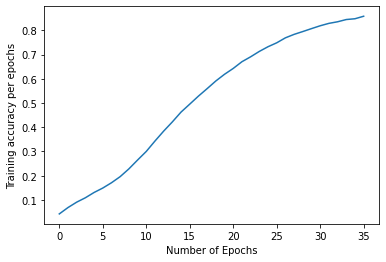

In [13]:
#plotting the training accuracy of the model
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.xlabel("Number of Epochs")
plt.ylabel('Training accuracy per epochs')
plt.show()

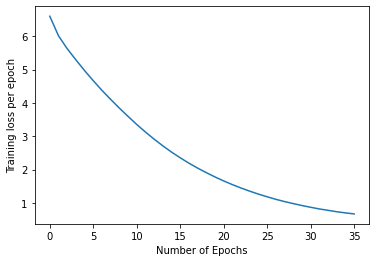

In [14]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel("Number of Epochs")
plt.ylabel('Training loss per epoch')
plt.show()

In [15]:
#generating next words given a seed
def next_word(seed):
  seed_text = seed
  next_words = 1
  for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = np.argmax(model.predict(token_list, verbose=0), axis = -1)
    output_word = ""
    for word, index in tokenizer.word_index.items():
      if index == predicted:
        output_word = word
        break
    seed_text += " " + output_word
  print(seed_text)

**GENERATING EXAMPLES AFTER TRAINING**

In [16]:
next_word('Lets go')

Lets go to


In [17]:
next_word('I want to meet')

I want to meet them


In [18]:
next_word('Congratulations')

Congratulations thank


In [19]:
next_word('Where are ')

Where are  you


In [20]:
next_word('Hello')

Hello sean


In [21]:
next_word('google')

google what


In [22]:
next_word('come')

come on


In [23]:
next_word('How are')

How are you


In [24]:
next_word('I want to')

I want to know


In [25]:
next_word('I want to meet your')

I want to meet your brothers


In [26]:
next_word('I want to meet')

I want to meet them
